In [106]:
#imports
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import accuracy_score

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

%matplotlib inline
plt.style.use('ggplot')

<h1 style = "color : blue">EDA</h1>
<ol>
<li>read_csv(), head(),shape, columns, describe(), info , .index</li>
<li>data types : categoricals vs numeric</li>
<li>value_counts() , nUnique, unique , sort_values()</li>
<li>null conts, null count per column</li>
<li>indexing : reset_index, set_index , </li>
<li>convert all columns to lower case, reindex (if necessary)</li>
<li>identify outliers (visually)</li>
<li>inspect each column and its relationship to others</li>
<li>groupBy, crossTab, agg</li>
<li>rename/getting columns: .rename() .columns() .columns().values.tolist()</li>
<li> replace, apply, apply_map, map</li>
</ol>
<p>
sources :
<ol>
<li>https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-1-exploratory-data-analysis-with-pandas-de57880f1a68</li>

<li>http://www.datasciencemadesimple.com/encode-decode-column-dataframe-python/</li>
<li>https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.select_dtypes.html</li>

</ol>
</p>
<p>Common Questions</p>
<ol>
<li>apply vs applymap vs map</li>
</ol>

In [2]:
df = pd.read_csv('../../../documents/mlFiles/Forbes2000.csv')
display(df.shape)
display(df.columns)
display(df.index)
display(df.head(5))
display(df.tail(5))

(2000, 9)

Index(['Unnamed: 0', 'rank', 'name', 'country', 'category', 'sales', 'profits',
       'assets', 'marketvalue'],
      dtype='object')

RangeIndex(start=0, stop=2000, step=1)

,Unnamed: 0,rank,name,country,category,sales,profits,assets,marketvalue
0,1,1,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,2,2,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
2,3,3,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
3,4,4,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
4,5,5,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54


,Unnamed: 0,rank,name,country,category,sales,profits,assets,marketvalue
1995,1996,1996,Siam City Bank,Thailand,Banking,0.48,0.02,11.27,1.47
1996,1997,1997,Yokogawa Electric,Japan,Business services & supplies,2.78,-0.22,2.96,3.29
1997,1998,1998,Hindalco Industries,India,Materials,1.35,0.14,2.47,2.76
1998,1999,1999,Nexans,France,Capital goods,5.09,0.00,2.71,0.88
1999,2000,2000,Oriental Bank of Commerce,India,Banking,0.81,0.10,7.16,1.17


In [3]:
display(df.describe())
display(df.index)

,Unnamed: 0,rank,sales,profits,assets,marketvalue
count,2000.000000,2000.000000,2000.000000,1995.000000,2000.000000,2000.000000
mean,1000.500000,1000.500000,9.697010,0.381133,34.041850,11.877655
std,577.494589,577.494589,18.002592,1.765454,99.678786,24.460197
min,1.000000,1.000000,0.010000,-25.830000,0.270000,0.020000
25%,500.750000,500.750000,2.017500,0.080000,4.025000,2.720000
50%,1000.500000,1000.500000,4.365000,0.200000,9.345000,5.150000
75%,1500.250000,1500.250000,9.547500,0.440000,22.792500,10.602500
max,2000.000000,2000.000000,256.330000,20.960000,1264.030000,328.540000


RangeIndex(start=0, stop=2000, step=1)

In [4]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
Unnamed: 0     2000 non-null int64
rank           2000 non-null int64
name           2000 non-null object
country        2000 non-null object
category       2000 non-null object
sales          2000 non-null float64
profits        1995 non-null float64
assets         2000 non-null float64
marketvalue    2000 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 140.7+ KB


None

<h3>Handling nulls</h3>
<ol>
<li>.isnull() : boolean table containing true/false for null values</li>
<li>.notnull()  similar to isnull </li>
<li>null count : .isnull().sum() or len(df) - df.count()</li>
<li>count() : total non-null items</li>
<li>.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)</li>
<li>.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)</li>
<li>.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad')</li>
</ol>

In [5]:
print('Null count per column\n', df.isnull().sum()) 
#methods like sum,mean return a DataFrame or Series for each column in the data set

Null count per column
 Unnamed: 0     0
rank           0
name           0
country        0
category       0
sales          0
profits        5
assets         0
marketvalue    0
dtype: int64


In [6]:
#since there are only 5 null values, show them all
df.loc[df['profits'].isnull()]

,Unnamed: 0,rank,name,country,category,sales,profits,assets,marketvalue
771,772,772,AMP,Australia,Insurance,5.40,NaN,42.94,6.70
1084,1085,1085,HHG,United Kingdom,Insurance,5.68,NaN,51.65,2.07
1090,1091,1091,NTL,United States,Telecommunications services,3.50,NaN,10.59,5.94
1424,1425,1425,US Airways Group,United States,Transportation,5.50,NaN,8.58,0.24
1908,1909,1909,Laidlaw International,United States,Transportation,4.48,NaN,3.98,1.49


<h4>Drop Columns</h4>
<ol>
df.drop(df.columns.values.tolist()[0], inplace = True) #drops first column, error since no axis is specified
df.drop(df.columns[0:2],axis=1) #simpler
</ol>

In [7]:
df.drop(df.columns[0:2],axis=1,inplace= True)#simpler 
df.head(2)

,name,country,category,sales,profits,assets,marketvalue
0,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54


<h1 style = "color : blue">Data Visualization</h1>
<p>Since the dataset is fairly clean, the plotting can begin.
Although we'll have to first study each column. We can do this by making a summary DataFrame. There will be two separate summary Dataframes : one for categorical data and the other for numerical data </p>

In [8]:
def makeSummaryCats(catCols):
    summaryDf=pd.DataFrame(columns=['colName','unique','nUnique','nanCnt'])
    summaryDf.colName=catCols 
    summaryDf.unique=summaryDf.colName.apply(lambda x: df[x].unique())
    summaryDf.nUnique=summaryDf.colName.apply(lambda x: df[x].nunique())
    summaryDf.nanCnt=summaryDf.colName.apply(lambda x: df[x].isnull().sum())
    return summaryDf

#for numerical columns, we may use the describe function and append an index to compute the null count
def makeSummaryNums():
    summaryDf = df.describe() #mean, std, max, quartiles, count of the numerical columns
#     nullCount=pd.Series(summaryDf.columns).apply(lambda x: df[x].isnull().sum())#add a nullCount row(and index) to summaryDf
#     nullCount.name = 'nullCount' #name of the index
#     display(nullCount)
    summaryDf.loc['nullCount'] = list(pd.Series(summaryDf.columns).apply(lambda x: df[x].isnull().sum())) #add row of null counts - doesn't work for some reason
#   nullCount = pd.Series(summaryDf.columns).apply(lambda x: df[x].isnull().sum())
#     summaryDf.loc['nullCount'] = list(nullCount) #add row of null counts
    return summaryDf

In [9]:
summaryCats=makeSummaryCats(['name','country','category'])
summaryCats

,colName,unique,nUnique,nanCnt
0,name,"[Citigroup, General Electric, American Intl Gr...",2000,0
1,country,"[United States, United Kingdom, Japan, Switzer...",61,0
2,category,"[Banking, Conglomerates, Insurance, Oil & gas ...",27,0


In [10]:
summaryNums = makeSummaryNums()
summaryNums

,sales,profits,assets,marketvalue
count,2000.000000,1995.000000,2000.000000,2000.000000
mean,9.697010,0.381133,34.041850,11.877655
std,18.002592,1.765454,99.678786,24.460197
min,0.010000,-25.830000,0.270000,0.020000
25%,2.017500,0.080000,4.025000,2.720000
50%,4.365000,0.200000,9.345000,5.150000
75%,9.547500,0.440000,22.792500,10.602500
max,256.330000,20.960000,1264.030000,328.540000
nullCount,0.000000,5.000000,0.000000,0.000000


In [11]:
df=df.sort_values(by=['sales'],ascending=False).reset_index(drop=True)
#sort dataset by ascending, so that it may be turned into a classification dataset
df.head(5)

,name,country,category,sales,profits,assets,marketvalue
0,Wal-Mart Stores,United States,Retailing,256.33,9.05,104.91,243.74
1,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54
2,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
3,General Motors,United States,Consumer durables,185.52,3.82,450.00,27.47
4,Ford Motor,United States,Consumer durables,164.20,0.76,312.56,26.29


In [12]:
df.loc[df['profits'].isnull()]
#show df with null columns

,name,country,category,sales,profits,assets,marketvalue
804,HHG,United Kingdom,Insurance,5.68,NaN,51.65,2.07
828,US Airways Group,United States,Transportation,5.50,NaN,8.58,0.24
843,AMP,Australia,Insurance,5.40,NaN,42.94,6.70
979,Laidlaw International,United States,Transportation,4.48,NaN,3.98,1.49
1167,NTL,United States,Telecommunications services,3.50,NaN,10.59,5.94


In [13]:
df['fortune500'] = 0
df.loc[:499,'fortune500'] = 1

In [14]:
df.iloc[490:505]

,name,country,category,sales,profits,assets,marketvalue,fortune500
490,Constellation Energy,United States,Utilities,9.70,0.48,15.80,6.68,1
491,Circuit City Stores,United States,Retailing,9.69,-0.09,4.41,2.31,1
492,FPL Group,United States,Utilities,9.67,0.88,25.16,11.89,1
493,Seiyu,Japan,Food markets,9.65,-0.77,5.27,2.02,1
494,Hutchison Whampoa,Hong Kong/China,Conglomerates,9.65,1.83,63.53,35.38,1
495,Dana,United States,Consumer durables,9.64,0.15,9.48,3.17,1
496,Capitalia,Italy,Banking,9.61,-0.30,146.67,6.36,1
497,National City,United States,Banking,9.59,2.12,113.93,21.51,1
498,Aon,United States,Insurance,9.58,0.59,26.21,8.09,1
499,Reliance Industries,India,Oil & gas operations,9.57,0.84,13.49,18.40,1


<h1 style = "color : blue; font-size:4em; font-family : Arial; text-align:center">3)EDA </h1>
<p>Common Seaborn plots</p>
<ol>
<li>Kde plots</li>
<li>Count plots</li>
<li>Bar PLots</li>
<li>Violin plots</li>
<li>Box plots</li>
<li>Correlation Map</li>
<li>Scatter PLots</li>
<li>Pair PLots</li>
</ol>

<h1 style = "color : pink">Unavariate Visualization</h1>
<p>histograms and distributions are really handy when studying single columns</p>

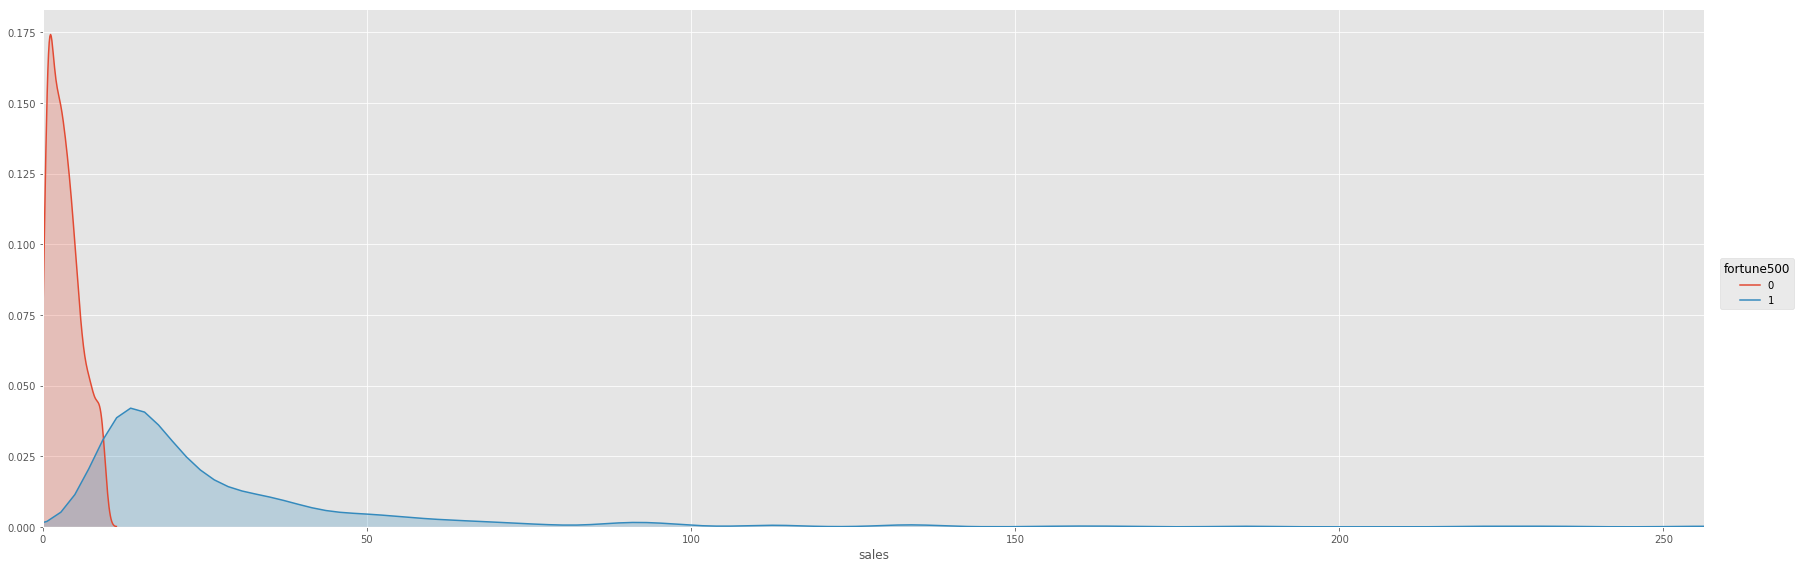

In [15]:
facet = sns.FacetGrid(df, hue="fortune500",size=8,aspect=3)
facet.map(sns.kdeplot,'sales',shade=True)
facet.set(xlim=(df['sales'].min(), df['sales'].max()))
facet.add_legend()

<h2 style = "color : pink">Barplots</h2>
<p>1 categorical column and 1 numerical column</p>
<ol>
<li>Country and (Sales, profits, assets, marketvalue)</li>
<li>Name and (Sales, profits, assets, marketvalue)</li>
<li>Category and (Sales, profits, assets, marketvalue)</li>
</ol>

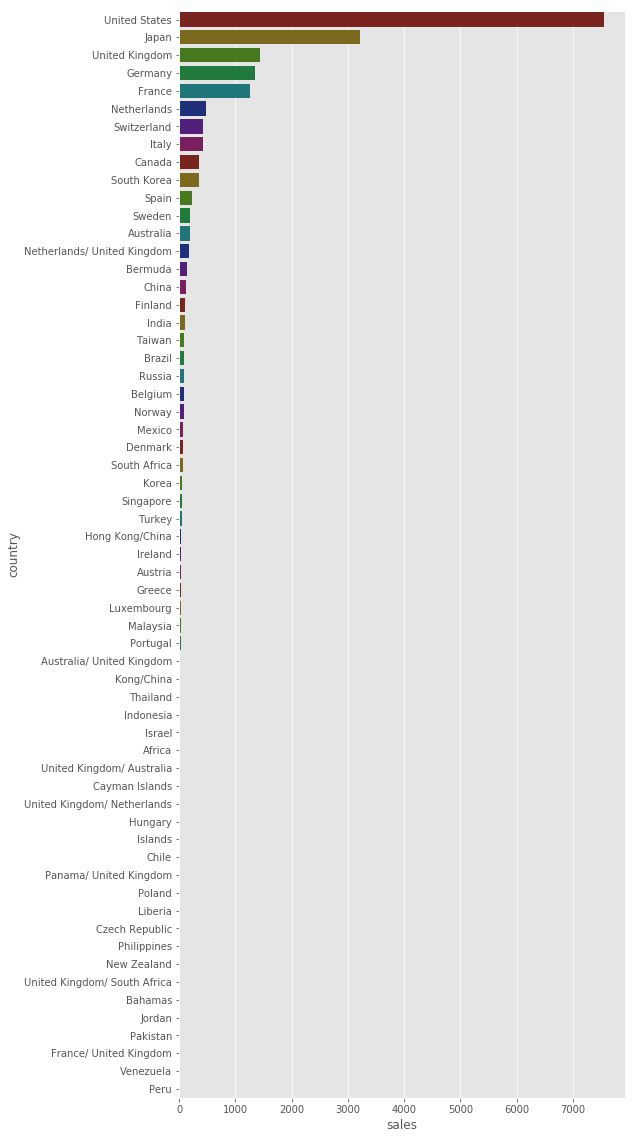

In [16]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,20)) 
sns.barplot(y='country', x='sales', data = df.groupby(['country'])['sales'].aggregate(np.sum).reset_index().sort_values('sales',ascending = False),palette = sns.hls_palette(8, l=.3, s=.8) ) #but what if we want it sorted
#in order for the bar chart to be shorted, the data has to be aggregated (but first grouped via groupBy())
#_country and sales

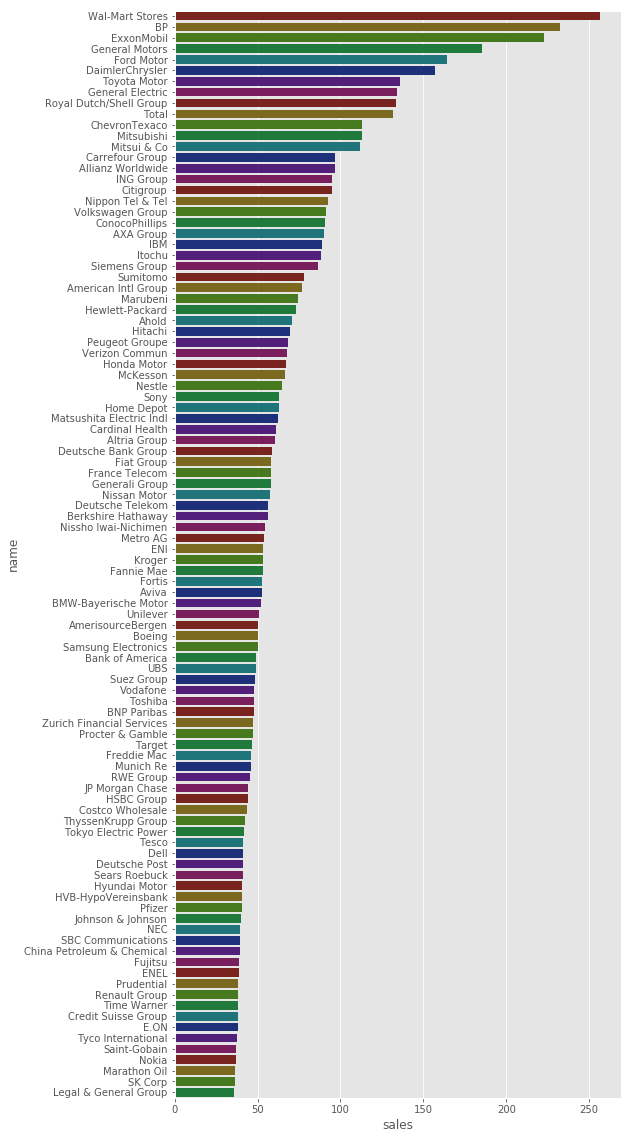

In [17]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(8,20)) 
sns.barplot(y='name', x='sales', data = df.iloc[:100].groupby(['name'])['sales'].aggregate(np.sum).reset_index().sort_values('sales',ascending = False),palette = sns.hls_palette(8, l=.3, s=.8) ) #but what if we want it sorted
#_name and sales

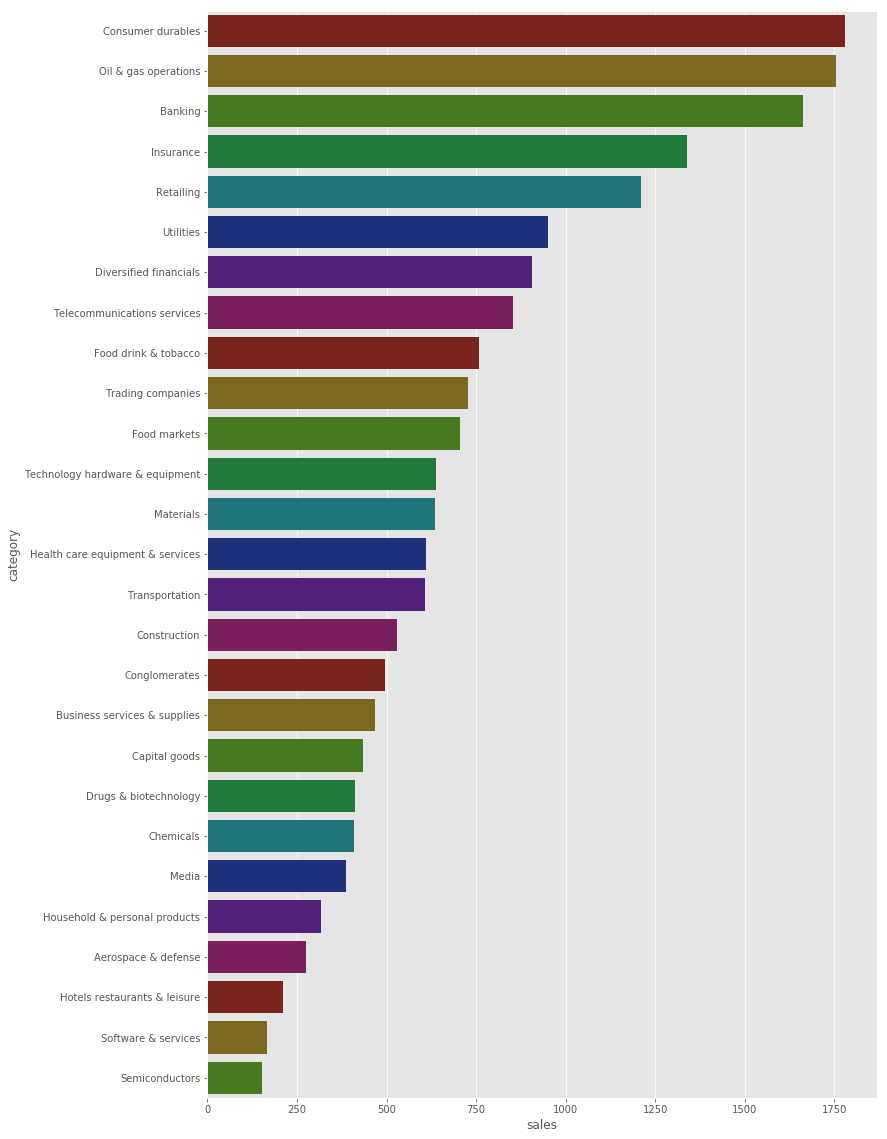

In [18]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,20)) 
sns.barplot(y='category', x='sales',data = df.groupby(['category'])['sales'].aggregate(np.sum).reset_index().sort_values('sales',ascending = False),palette = sns.hls_palette(8, l=.3, s=.8) ) #but what if we want it sorted
#_category and sales

<h2 style = "color : pink">Countplots</h2>
<p>1 categorical column (for count), and 1 categorical column(for hue) </p>
<p>in a countplot, only one coordinate is required - that is either y or x. </p>
<ol>
<li>x='category', hue='fortune500'</li>
<li>x='country', hue='fortune500'</li>
<li>since name is not a repeated category, it is not useful for this step</li>
</ol>

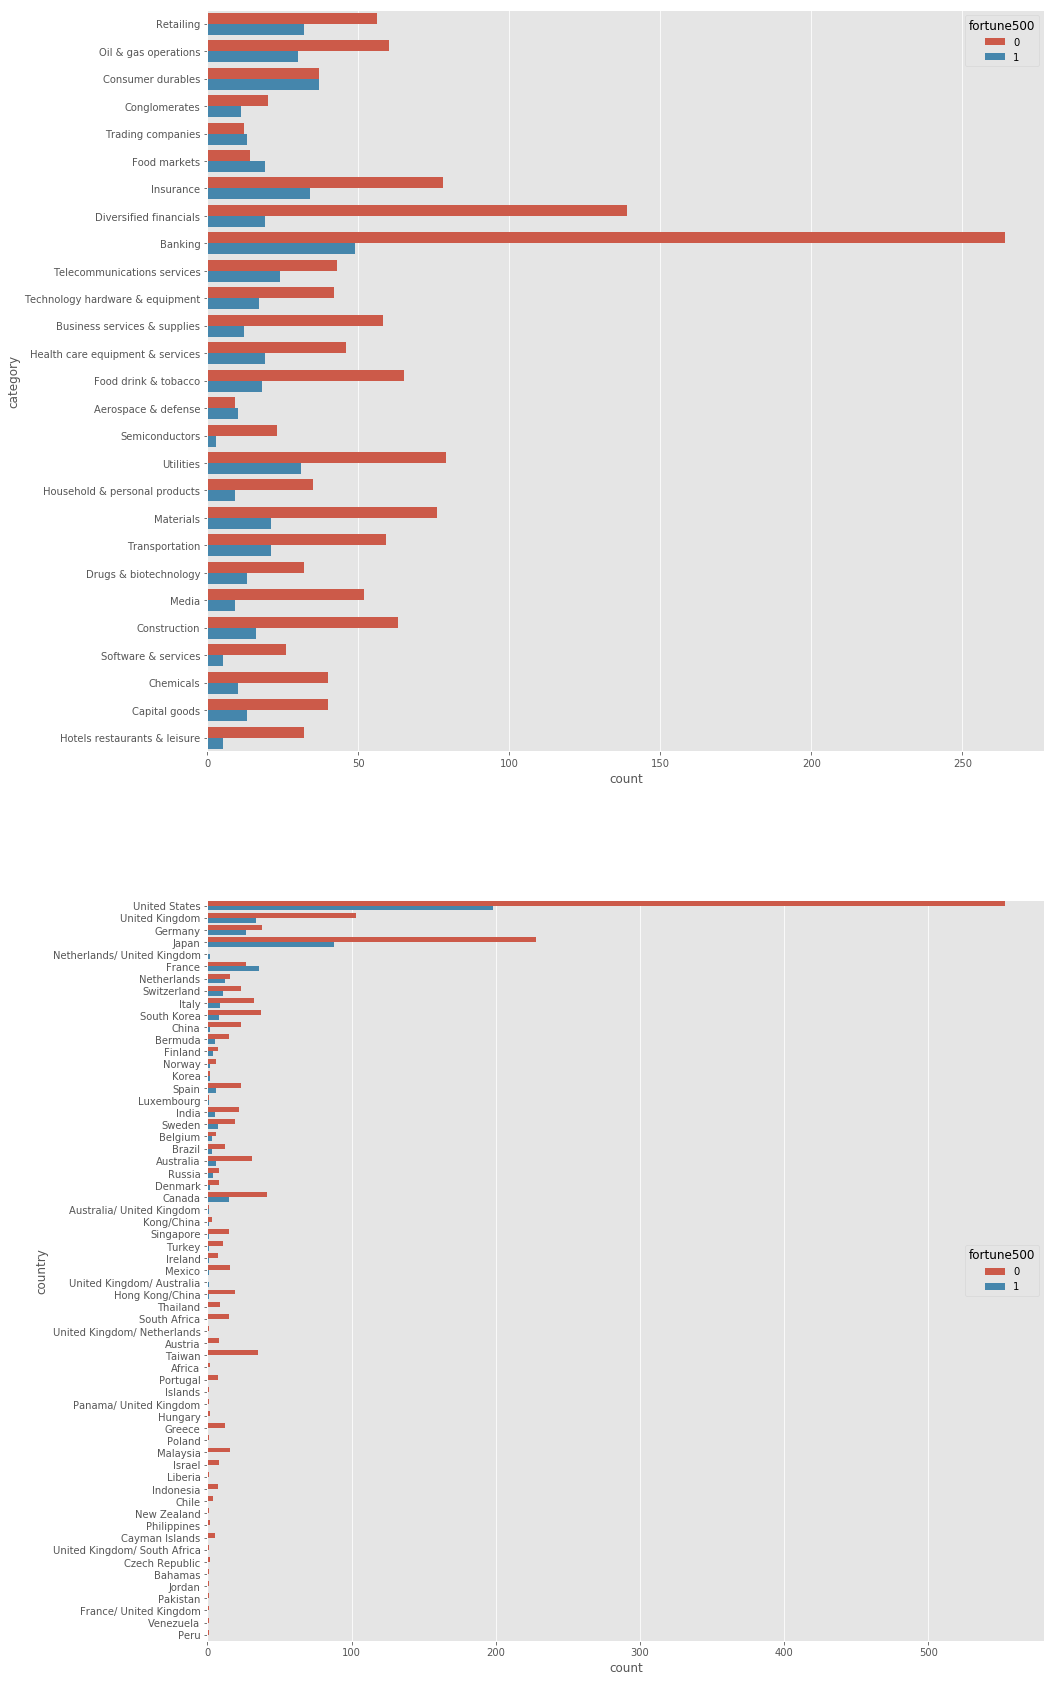

In [19]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,30))
#groupby(['name'])['sales'].aggregate(np.sum).reset_index().sort_values('sales',ascending = False)
sns.countplot(y='category',hue='fortune500',data=df,ax=ax[0]) #2 categorical columns
sns.countplot(y='country',hue='fortune500',data=df,ax=ax[1]) #2 categorical columns

In [20]:
df.loc[df['country']=='Ireland']

,name,country,category,sales,profits,assets,marketvalue,fortune500
426,CRH,Ireland,Construction,11.05,0.65,11.09,11.43,1
698,Depfa Bank,Ireland,Diversified financials,6.85,0.25,153.20,5.61,0
702,Allied Irish Banks,Ireland,Banking,6.80,1.10,89.95,15.04,0
845,Bank of Ireland,Ireland,Banking,5.40,0.91,97.46,14.02,0
1079,Kerry Group,Ireland,Food drink & tobacco,3.94,0.11,2.67,3.38,0
1566,Irish Life & Permanent,Ireland,Insurance,1.72,0.30,34.88,4.69,0
1629,Anglo Irish Bank,Ireland,Banking,1.44,0.30,29.74,5.53,0
1782,Ryanair Holdings,Ireland,Transportation,0.92,0.26,2.69,4.71,0


<h2 style = "color : pink">Dist plot</h2>
<p>1 categorical column and 1 numerical column</p>
<ol>
<li>Country and (Sales, profits, assets, marketvalue)</li>
<li>Name and (Sales, profits, assets, marketvalue)</li>
<li>Category and (Sales, profits, assets, marketvalue)</li>
</ol>

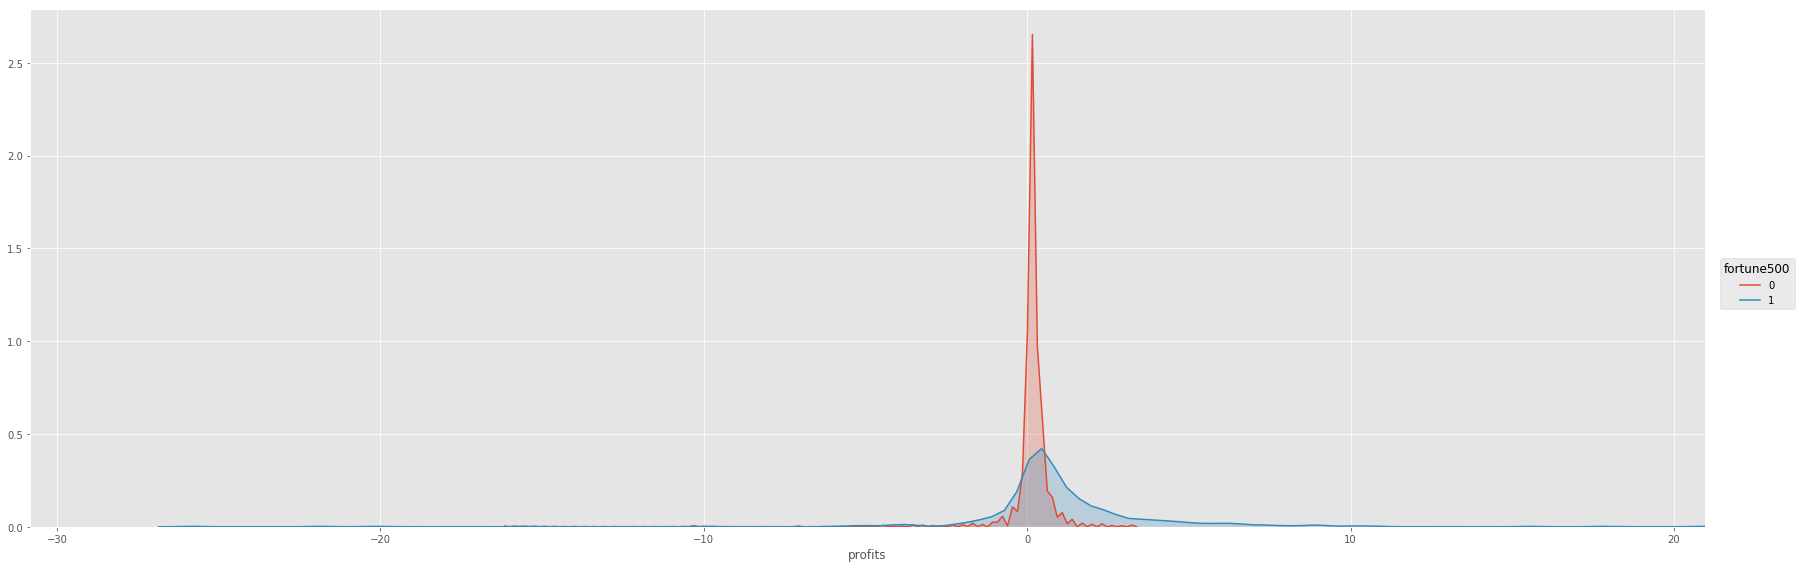

In [21]:
facet = sns.FacetGrid(df, hue="fortune500",size=8,aspect=3)
facet.map(sns.kdeplot,'profits',shade=True)
facet.set(xlim=(df['profits'].min()-5, df['profits'].max()))
facet.add_legend()

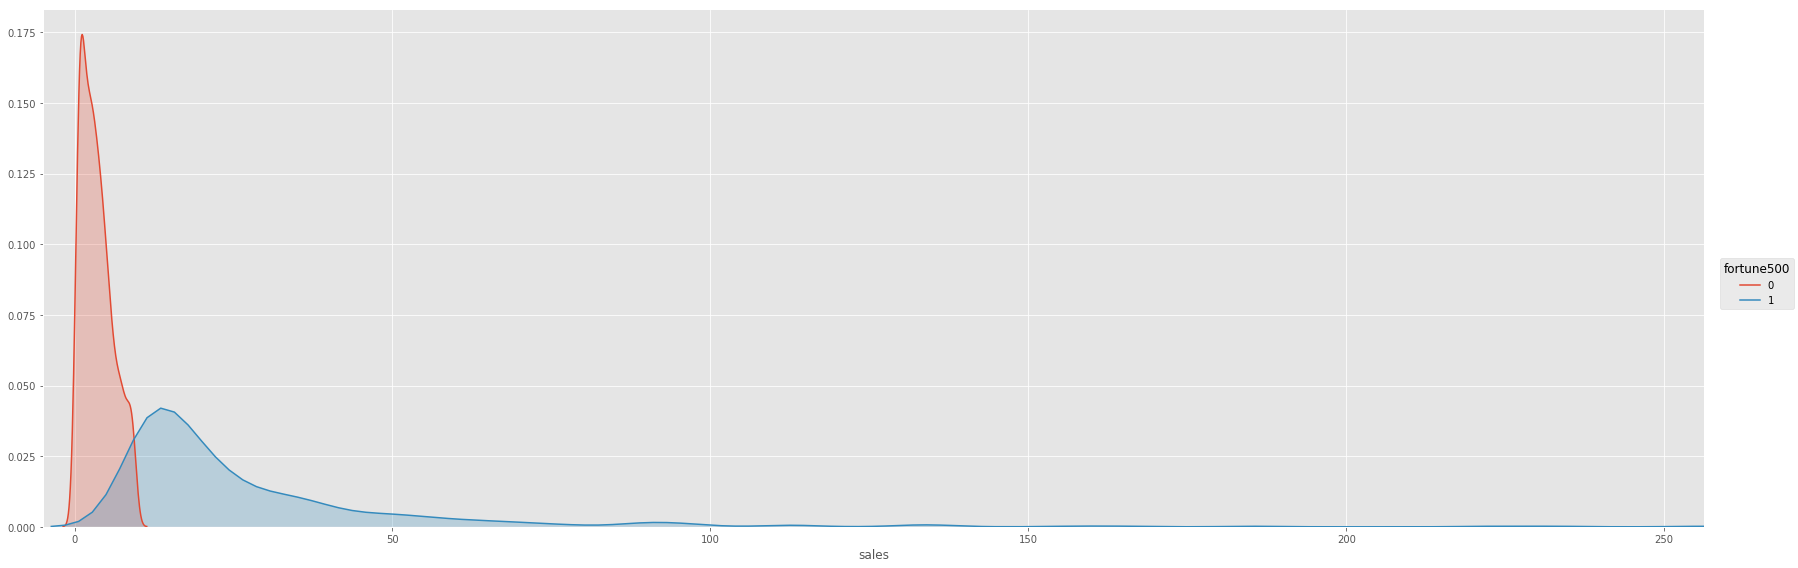

In [22]:
facet = sns.FacetGrid(df, hue="fortune500",size=8,aspect=3)
facet.map(sns.kdeplot,'sales',shade=True)
facet.set(xlim=(df['sales'].min()-5, df['sales'].max()))
facet.add_legend()

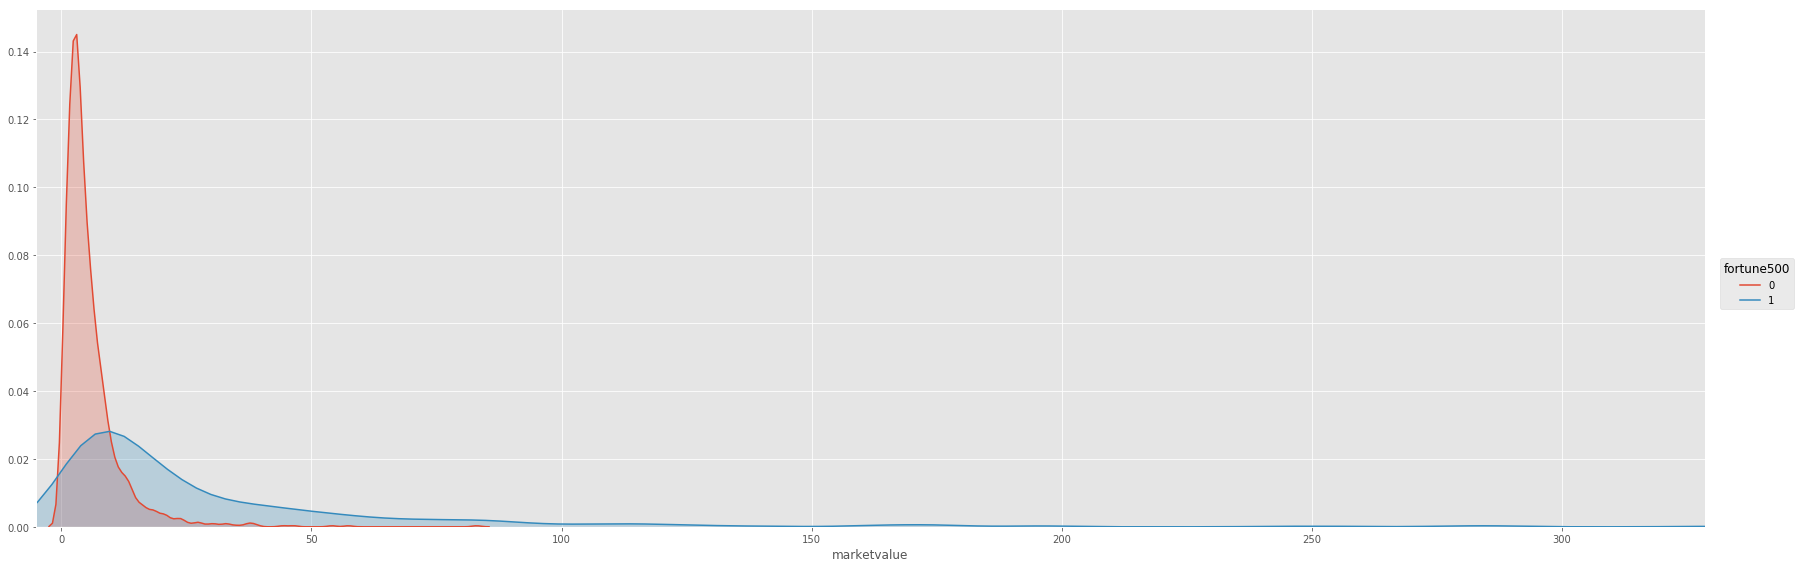

In [23]:
facet = sns.FacetGrid(df, hue="fortune500",size=8,aspect=3)
facet.map(sns.kdeplot,'marketvalue',shade=True)
facet.set(xlim=(df['marketvalue'].min()-5, df['marketvalue'].max()))
facet.add_legend()

<h1 style = "color : blue; font-size:4em; font-family : Arial; text-align:center">3)Features Engineering</h1>
<ol>
<li>Encoding, dropping, binning (via quartiles, averages,etc),and replacing</li>
</ol>

In [24]:
"""
for now, fill all null columns with 0,
so as to get to the model selection phase.
Later on, the nulls may be replaced using more advance means
"""
df.profits.fillna(0,inplace=True)
display(df[df['profits'].isnull()])

,name,country,category,sales,profits,assets,marketvalue,fortune500


In [25]:
#bin the following columns: marketvalues,sales,profits,assets

<h2 style = "color : pink">Binning/mapping</h2>
<ol>
<li></li>
<li></li>
</ol>

<h2 style = "color : pink">Encoding</h2>
<ol>
<li></li>
<li></li>
</ol>

<h1 style = "color : blue; font-size:4em; font-family : Arial; text-align:center">4)Model Selection</h1>
Some models do not require numerical inputs
<ol>
<li></li>
</ol>

In [26]:
display(df.head(10))#before shuffling
df = df.sample(frac=1).reset_index(drop=True)
display(df.head(10))#after shuffling

,name,country,category,sales,profits,assets,marketvalue,fortune500
0,Wal-Mart Stores,United States,Retailing,256.33,9.05,104.91,243.74,1
1,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54,1
2,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02,1
3,General Motors,United States,Consumer durables,185.52,3.82,450.00,27.47,1
4,Ford Motor,United States,Consumer durables,164.20,0.76,312.56,26.29,1
5,DaimlerChrysler,Germany,Consumer durables,157.13,5.12,195.58,47.43,1
6,Toyota Motor,Japan,Consumer durables,135.82,7.99,171.71,115.40,1
7,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54,1
8,Royal Dutch/Shell Group,Netherlands/ United Kingdom,Oil & gas operations,133.50,8.40,100.72,163.45,1
9,Total,France,Oil & gas operations,131.64,8.84,87.84,116.64,1


,name,country,category,sales,profits,assets,marketvalue,fortune500
0,Eastman Chemical,United States,Chemicals,5.80,-0.27,6.25,3.27,0
1,Central Japan Railway,Japan,Transportation,11.53,0.42,46.05,20.66,1
2,CLP Holdings,China,Utilities,3.35,0.91,7.79,11.99,0
3,Owens Corning,United States,Construction,4.90,0.03,7.21,0.02,0
4,Lowe`s Cos,United States,Retailing,30.03,1.79,18.68,45.29,1
5,Korea Gas,South Korea,Utilities,6.17,0.25,7.87,1.76,0
6,Gazprom,Russia,Oil & gas operations,19.21,3.81,77.15,36.28,1
7,Leggett & Platt,United States,Consumer durables,4.39,0.21,3.89,4.66,0
8,Toto,Japan,Construction,3.72,0.03,3.74,2.88,0
9,CSN-Cia Siderurgica,Brazil,Materials,1.46,-0.06,4.22,4.24,0


In [27]:
hotEnc = OneHotEncoder(sparse=False)

In [28]:
#labelencode country and category
encodedCnty = pd.get_dummies(df['country'], prefix = '')
encodedCat = pd.get_dummies(df['category'], prefix = '')

In [29]:
#concat country and category
df = pd.concat([df, encodedCnty,encodedCat], axis=1)
display(df.head(2))

,name,country,category,sales,profits,assets,marketvalue,fortune500,_Africa,_Australia,...,_Media,_Oil & gas operations,_Retailing,_Semiconductors,_Software & services,_Technology hardware & equipment,_Telecommunications services,_Trading companies,_Transportation,_Utilities
0,Eastman Chemical,United States,Chemicals,5.80,-0.27,6.25,3.27,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central Japan Railway,Japan,Transportation,11.53,0.42,46.05,20.66,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [30]:
# display(df.info().head(10))
# display(df.info().tail(10))

In [46]:
df = df.select_dtypes(include = ['int64','float64','uint8'])
display(df.head(15))
#drop all non numeric columns

,sales,profits,assets,marketvalue,fortune500,_Africa,_Australia,_Australia/ United Kingdom,_Austria,_Bahamas,...,_Media,_Oil & gas operations,_Retailing,_Semiconductors,_Software & services,_Technology hardware & equipment,_Telecommunications services,_Trading companies,_Transportation,_Utilities
0,5.80,-0.27,6.25,3.27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.53,0.42,46.05,20.66,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.35,0.91,7.79,11.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.90,0.03,7.21,0.02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.03,1.79,18.68,45.29,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,6.17,0.25,7.87,1.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,19.21,3.81,77.15,36.28,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,4.39,0.21,3.89,4.66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.72,0.03,3.74,2.88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.46,-0.06,4.22,4.24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
left=df.drop('fortune500',axis=1)
right = df['fortune500']

In [54]:
display(left.head(10))
display(right.head(10))

,sales,profits,assets,marketvalue,_Africa,_Australia,_Australia/ United Kingdom,_Austria,_Bahamas,_Belgium,...,_Media,_Oil & gas operations,_Retailing,_Semiconductors,_Software & services,_Technology hardware & equipment,_Telecommunications services,_Trading companies,_Transportation,_Utilities
0,5.80,-0.27,6.25,3.27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11.53,0.42,46.05,20.66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.35,0.91,7.79,11.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.90,0.03,7.21,0.02,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,30.03,1.79,18.68,45.29,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,6.17,0.25,7.87,1.76,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,19.21,3.81,77.15,36.28,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,4.39,0.21,3.89,4.66,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,3.72,0.03,3.74,2.88,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1.46,-0.06,4.22,4.24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    0
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: fortune500, dtype: int64

In [70]:
#split
left1,left2,right1, right2 = train_test_split(left, right, test_size=.2)

In [71]:
print('left1.shape : ',left1.shape)
print('right1.shape : ',right1.shape)

print('\nleft2.shape : ',left2.shape)
print('right2.shape : ',right2.shape)

left1.shape :  (1600, 92)
right1.shape :  (1600,)

left2.shape :  (400, 92)
right2.shape :  (400,)


In [75]:
decisionTree = tree.DecisionTreeClassifier()
decisionTree.fit(left1,right1) #fit on train() set
decisionTreePredict = decisionTree.predict(left2)

In [101]:
#right2 is finally used with the accuracy_score method
print(accuracy_score(right2,decisionTreePredict))
feature_importances = pd.DataFrame(decisionTree.feature_importances_,
                                   index = left1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

1.0


,importance
sales,1.0
_Turkey,0.0
_Business services & supplies,0.0
_Banking,0.0
_Aerospace & defense,0.0
_Venezuela,0.0
_United States,0.0
_United Kingdom/ South Africa,0.0
_United Kingdom/ Netherlands,0.0
_United Kingdom/ Australia,0.0


In [79]:
kNeighbors = neighbors.KNeighborsClassifier().fit(left1,right1)
kNeighborsPredict = kNeighbors.predict(left2)

In [103]:
print(accuracy_score(right2,kNeighborsPredict))
feature_importances = pd.DataFrame(kNeighbors.feature_importances_,
                                   index = left1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

0.9675


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [81]:
logRegCV = linear_model.LogisticRegressionCV().fit(left1,right1)
logRegCVPredict = model3.predict(left2)

In [104]:
print(accuracy_score(right2,logRegCVPredict))
feature_importances = pd.DataFrame(logRegCV.feature_importances_,
                                   index = left1.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

0.7525


AttributeError: 'LogisticRegressionCV' object has no attribute 'feature_importances_'

In [83]:
gausNB = naive_bayes.GaussianNB().fit(left1,right1)
gausNBPredict = gausNB.predict(left2)

In [99]:
print(accuracy_score(right2,gausNBPredict))

0.3475


In [86]:
lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(trainX,trainY)
ldaPredict = lda.predict(left2)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [100]:
print(accuracy_score(right2,ldaPredict))

0.7475


<h1 style = "color : blue; font-size:4em; font-family : Arial; text-align:center">5)Model Evaluation And Hypeparemeter Tuning</h1>
<ol>
<li>AUC, MSE,RMSE, etc</li>
</ol>

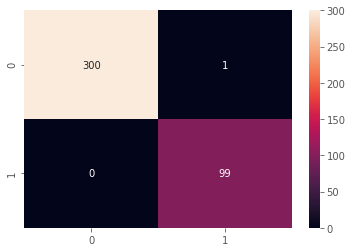

In [108]:
cm = confusion_matrix(right2,logRegCV.predict(left2))
sns.heatmap(cm,annot=True,fmt="d") 

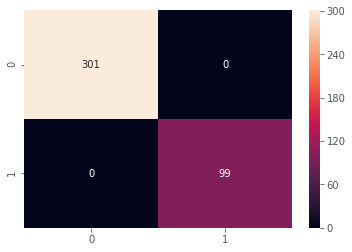

In [109]:
cm = confusion_matrix(right2,decisionTree.predict(left2))
sns.heatmap(cm,annot=True,fmt="d") 

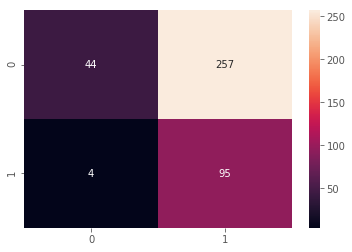

In [110]:
cm = confusion_matrix(right2,gausNB.predict(left2))
sns.heatmap(cm,annot=True,fmt="d") 